### Group Project: Sonar Data - By DSCI 100, Group 44
# Watch your move, Mine or just a rock? 
![sonar](https://media.giphy.com/media/deyTQvcZyp7jcRLPcD/giphy.gif)

<hr>

# 0.0 💥Introduction💥

### 0.1 What is Sonar
Sonar is a technique that uses sound propagation for measuring distances or detect objects under the surface of water. 
 
### 0.2 Insight into the the Sonar Dataset
Sonar dataset contains data about training a network to discriminate between sonar signals bounced off a metal cylinder and the signals bounced off a roughly cylindrical rock.  "Sonar.mines" dataset contains 111 patterns from sonar sgnals bounced off a metal cylinder. "Sonar.rocks" dataset contains 97 patterns from rocks under similar conditions. The transmitted sonar signal is rising in frequency. The dataset contains the sonar signals from various angles for the cylinder and the rock; 90 degrees and 180 degrees. The letter "R" is recorded if the object is a rock and "M" if the object is a mine. 
 
### 0.3 Background information
As proposed in Gerald J. Dobeck, John C. Hyland, Le'Derick Smedley's thesis, a k-nearest neighbor attractor-based neural network (KNN) classifier and an optimal discriminatory filter classifier are used to classify sea mine in sonar imagery and the advanced mine detection. Nonlinear matched filter is used to identify mine-size regions in the sonar image. 
From the study on metal mine detection from underwater sonar images using data mining and machine learning techniques, Venkataraman Padmaja, V. Rajendran and P. Vijayalakshmi mentioned that because of various factors; change in target shapes and envioronments, classification and detection of sonar imagery is a major problem. Since the technique in image processing needs a special method to detect the metal from the rocks, they used intruder detection techniques using data mining/machine learning to distinguish metals from rock. The paper proposes the new technique by discriminating and detection of objects in underwater with accuracy of 90% and 86% for better classification. 
 
### 0.4 Question
Can we use the Connectionist Bench dataset containing statistical information that describes the Sonar candidates to predict whether a future candidate is a Sonar or not. 
<hr>


# 1.0 💥Methods & Results💥

To do an exploratory analysis of our data set and answer our predictive question, our group decided to do a **knn classification**. By doing so, we are able to determine the best number of neighbors that should be used to result in the most accurate categorical prediction for `Mine` or `Rock`. We began by loading our data from the original [source](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)) from the internet and reading the data frame in Juptyer. The data was already cleaned and did not require wrangling or cleaning for the classification model. We did wrangle the data, but for the purposes of exploratory analysis, and the unwrangled data frame was used for training and testing. Furthermore, the data was also standardized.

**Note**: We had to change the attribute names for the frequency bands to be of fixed length because otherwise, when plotting, the ggplot library arranges the variables alphabetically.We determined that renaming the attribute names would not affect the model but would help in visualization.

The next step in our analysis was to randomly split the data into a training set and a testing set. This allowed us to work with 75% of the data set (*training*) without being biased. We could then compare our results to the remaining 25% of the data set (*testing*) that was not manipulated. The training data was then displayed in a scatterplot matrix to show correlations.

An important step that we took was to set the seed to a fixed number so that our work is **reproducible**.

First, we created a model specification with `kknn` engine and `classification` mode. The data then underwent a **5 fold** cross validation. This ensures a more accurate representation of the training data, and the randomness does not negatively affect our model. We then created a recipe and processed the data so it was centred and scaled. This is important to ensure all variables have equal weighting in the final prediction.

**Note**: Although our data was already scaled, we still needed to centre it.

Finally, the model was fine-tuned and the accuracy was measured.We then created a line graph using `ggplot` of the accuracy of the training data to determine the best number of neighbors. Using this number of neighbors, we created a new model and trained it. Then, we tested the model using test data that we had initially split (25% of the original dataset). We calculated the accuracy of our model on test data to know if our model would generalise well to unseen data.

Finally, we produced a confusion matrix to evaluate our analysis.

### 1.1 Loading the necessary libraries

In [1]:
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)
SEED <- 787      # Constant value of seed used throughout the analysis

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### 1.2 Reading the data from the Web

In [2]:
column_names<-c('X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09', 'X10',
                'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
                'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30',
                'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40',
                'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50',
                'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59','X60', 'type')  #not required for the actual model training
sonar_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data",
                        col_names = column_names) |>
              mutate(type = as.factor(type),
                     obs = 1:n())            # labeling observations to identify each row after wrangling

Rows: 208 Columns: 61
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): type
dbl (60): X01, X02, X03, X04, X05, X06, X07, X08, X09, X10, X11, X12, X13, X...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### 1.3 Exploratory Analysis
Here we plot various frequency bands against magnitude(Standardized) and groupped by their respective observations. The obsevations are coloured by the type: `Rock` or `Mine`. We will also be passing the argument `alpha=0.4` to the line graph to avoid **overplotting**.

[1] "[Plot 1] Overlayed frequency spectrum"


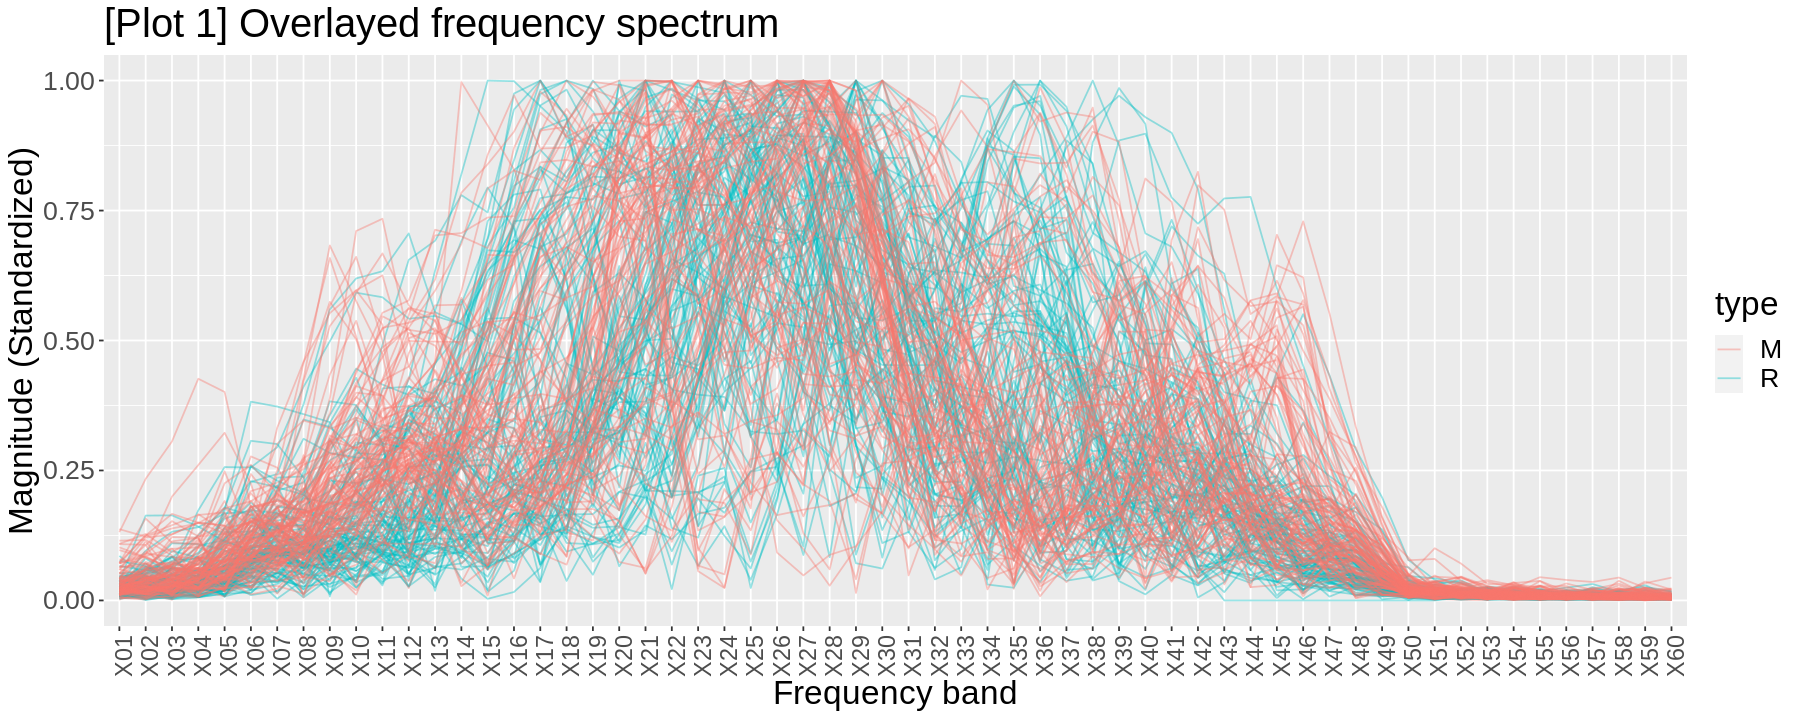

In [3]:
options(repr.plot.width=15,repr.plot.height=6)
sonar_data_long <- pivot_longer(sonar_data,
                                cols = X01:X60,
                                values_to = "magnitude",
                                names_to  = "time")

exp_plot <- ggplot(sonar_data_long, aes(x = time, y = magnitude)) +
            geom_line(aes(color = type, group = obs), alpha=0.4) +
            theme(text=element_text(size=20),
                  axis.text.x = element_text(angle = 90, vjust = 0.75, hjust=1, size = 14)) +
            labs(x="Frequency band",
                 y="Magnitude (Standardized)",
                 label="Type") +
            ggtitle("[Plot 1] Overlayed frequency spectrum")
exp_plot
print('[Plot 1] Overlayed frequency spectrum')

From analyzing the above graph (*plot. 1*), there seems to be no obvious distinction in the signature of frequency bands for `Mine` or `Rock`.

### 1.4 Splitting Data
As stated before we will be splitting our data in 2 parts, 75% for training data nad 25% for testing data. So, `prop = 0.75` and `strata = type`.

In [4]:
set.seed(SEED)
sonar_split <- initial_split(sonar_data, prop = 0.75, strata = type)
sonar_train <- training(sonar_split)
sonar_test <- testing(sonar_split) 

### 1.5 Making the recipe and model specification
We will not touch the testing data(`sonar_test`) till our model is ready to make predictions on unseen data. We first create a `sonar_recipe` and then a `sonar_intial_spec` for the model specification using the `kknn` engine and `classification` mode. Since, we are not sure how many neighbors would be best for the prediction, we will set `neighbors=tune()`.

In [5]:
sonar_recipe <- recipe(type ~ ., data = sonar_train) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

sonar_initial_spec <- nearest_neighbor(weight_func="rectangular",neighbors = tune()) |>
                      set_engine("kknn") |>
                      set_mode("classification")

### 1.6 Cross-validation for k = 1 to 30
We perform a **5 fold** corss validation and then train the model by supplying, `sonar_recipe`, `sonar_initial_spec` and `sonar_vfold`. We also use `collect_metrics` to get the statistics about the model's performance for the different values of k.

In [6]:
set.seed(SEED)
sonar_vfold <-  vfold_cv(sonar_train, strata = type,v = 5)

ks <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

knn_results <- workflow() |>
               add_recipe(sonar_recipe) |>
               add_model(sonar_initial_spec) |>
               tune_grid(resamples = sonar_vfold, grid = ks) |>
               collect_metrics()
print("[Table 1] Statistics for different k values using 5 fold cross validation")
knn_results

[1] "[Table 1] Statistics for different k values using 5 fold cross validation"


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8970968,5,0.01822403,Preprocessor1_Model01
1,roc_auc,binary,0.8959244,5,0.01806487,Preprocessor1_Model01
2,accuracy,binary,0.8970968,5,0.01822403,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
29,roc_auc,binary,0.9143925,5,0.01884404,Preprocessor1_Model29
30,accuracy,binary,0.8196237,5,0.01141059,Preprocessor1_Model30
30,roc_auc,binary,0.9119590,5,0.01995487,Preprocessor1_Model30


### 1.7 Plotting the the model accuracy against k
As it is difficult to find a good value of **k** just by looking at the table above(*table 1*), we can plot a graph with `mean` on the y-axis and `neighbors` on the x-axis. Then, we can find the best value of **k** for our model.

[1] "[Plot 2] Accuracies for each k"


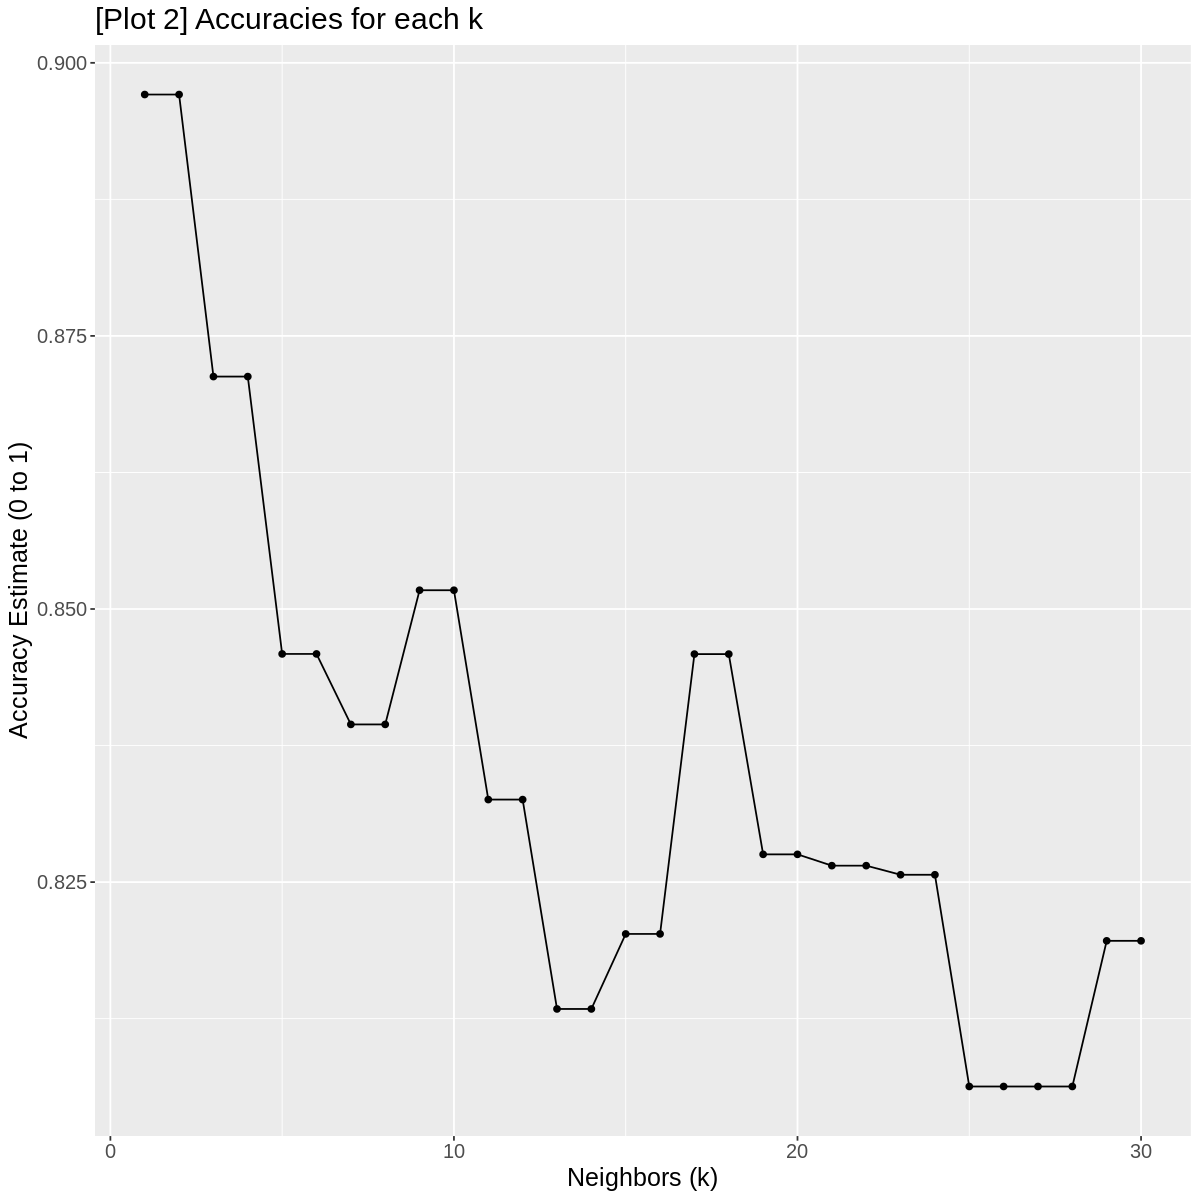

In [7]:
set.seed(SEED)
options(repr.plot.height = 10, repr.plot.width = 10)
accuracies <- knn_results |>
              filter(.metric == "accuracy")

accuracy_vs_k_lots <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                      geom_point() +
                      geom_line() +
                      labs(x = "Neighbors (k)", y = "Accuracy Estimate (0 to 1)") + 
                      theme(text = element_text(size = 15)) +
                      ggtitle("[Plot 2] Accuracies for each k")

print("[Plot 2] Accuracies for each k")
accuracy_vs_k_lots

### 1.8 Finding the best k
we can choose the **k** value from the above graph(*plot 2*) which would be **1**, or we could extract it from the data frame as shown below.

In [8]:
best_k_stats <- accuracies |>
                arrange(desc(mean)) |>
                slice(1)
best_k_stats
print("[Table 2] Statistics for Best k")

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8970968,5,0.01822403,Preprocessor1_Model01


[1] "[Table 2] Statistics for Best k"


### 1.9 Building model with the best k
Now we extract the best value of `neighbors` from the above data frame and use it to create a new model specification. Finall, we fit the `sonar_data` with the `sonar_recipe` and new model spec, `best_knn_spec`.

In [9]:
set.seed(SEED)
k <- select(best_k_stats,neighbors) |>
     pull()

best_knn_spec <- nearest_neighbor(weight_func="rectangular",neighbors = k) |>
                 set_engine("kknn") |>
                 set_mode("classification")

best_fit <- workflow() |>
            add_recipe(sonar_recipe) |>
            add_model(best_knn_spec) |>
            fit(data = sonar_train)

best_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(1,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.05806452
Best kernel: rectangular
Best k: 1

### 1.10 Predicting test data
We use the above fit, `best_fit` to predict the `type` of our testing data(`sonar_test`). Then we calculate the **RMSPE** of our model.

In [10]:
sonar_test_predictions <- predict(best_fit, sonar_test) |>
                          bind_cols(sonar_test)

sonar_test_predictions |>  metrics(truth = type, estimate = .pred_class) |>
                           filter(.metric == "accuracy")
print("[Table 3] RMSPE of Best fit")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9245283


[1] "[Table 3] RMSPE of Best fit"


### 1.11 Confusion Matrix
Finally to asses the accuracy in terms of *raw data* by creating a **confusion matrix**.

In [11]:
sonar_conf_mat <- sonar_test_predictions |>
                  conf_mat(truth = type, estimate = .pred_class)
sonar_conf_mat
print("[Table 4] Confusion Matrix for Best fit")

          Truth
Prediction  M  R
         M 26  2
         R  2 23

[1] "[Table 4] Confusion Matrix for Best fit"


<hr>

# 2.0 💥Discussion💥

Our project found out the best value for the number of neighbors for a knn classification model of the sonar data is 1. Our model had a RMSE of 90.9% which when compared to RMSPE of 92.45% suggests that the model will generalize well over unseen data. The impacts of these findings can be used to determine if an object is a rock or a mine. This could be useful for ships and submarines when traveling in a hostile territory, for example a war zone. A more accurate version of the model found in this study could be used in rescue vessels. Questions for future study could be to determine the size, distance or depth of a mine.
<hr>

# 3.0 💥References💥

citation from intro + citation for data